In [ ]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
import torchvision.transforms as T
from torch.utils.data import DataLoader , random_split
import torch.nn.functional as F
import numpy as np
from train_test_helper_functions import * 
from model import * 

In [ ]:

train_data = datasets.CIFAR10(
    root = "data" ,
    train = True ,
    download = True ,
    transform = T.ToTensor() ,#T.Compose([T.ToTensor() , T.Lambda(torch.flatten)]),
    target_transform = None
)

train_data , validation_data = random_split(train_data , [45_000 , 5_000])

test_data = datasets.CIFAR10(
    root = "data" ,
    train = False ,
    download = True ,
    transform = T.ToTensor() ,#T.Compose([T.ToTensor() , T.Lambda(torch.flatten)]),
    target_transform = None
)

100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


In [ ]:
train_dataloader = DataLoader(dataset = train_data , batch_size = 64 , shuffle = True)
validation_dataloader = DataLoader(dataset = validation_data, batch_size = 64 , shuffle=False)
test_dataloader = DataLoader(dataset = test_data , batch_size = 64 , shuffle = False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device.type

'cuda'

In [ ]:
#train the network
net =  CNN(in_channels = 3  , hidden_units1 = 128, hidden_units2 = 128, output_shape=10).to(device)
epochs = 30

In [ ]:
optimizer = torch.optim.Adam(net.parameters() , lr=0.00005, amsgrad = True, weight_decay=0.2)
loss_function = nn.CrossEntropyLoss()
(train_loss , validation_loss) = fit(net , train_dataloader , loss_function , optimizer ,epochs, device , validation_dataloader , earlyStopping = False)

In [ ]:
(accuracy , loss) = evaluate(net , test_dataloader , loss_function , device)
print(f"Accuracy : {accuracy} , Loss : {loss}")

Accuracy : 0.8367 , Loss : 0.5548756511688232


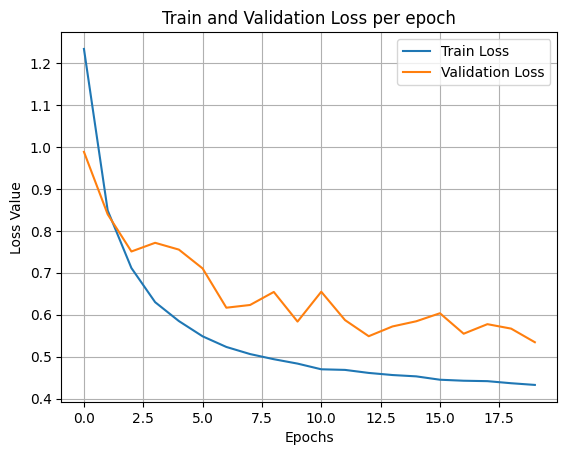

In [ ]:
import matplotlib.pyplot as plt


x_axis = [i for i in range(len(train_loss))]

plt.title("Train and Validation Loss per epoch")
plt.plot(x_axis , train_loss , x_axis , validation_loss)
plt.legend(("Train Loss" , "Validation Loss"))
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.grid()
plt.show()
